#Exercise 3

#Part 1
1. **For $f(x)$:**
   $$
   f(x) = x_1^2 + x_2^2 + 9
   $$
   - Critical points: $\nabla f(x) = \mathbf{0} \implies (2x_1, 2x_2) = (0, 0)$
   - Solving for $x_1$ and $x_2$: $x_1 = 0$, $x_2 = 0$
   - Minimizer: $(0, 0)$
   - Minimum Value: $f(0, 0) = 9$

2. **For $g(x)$:**
   $$
   g(x) = \sum_{i=1}^{n} \frac{(x_i - i^2)^2}{P(i)}
   $$
   - Partial derivative with respect to $x_i$: $\frac{2(x_i - i^2)}{P(i)} = 0$
   - Solving for $x_i$: $x_i = i^2$ for all $i$
   - Minimizer: $x_i = i^2$ for all $i$
   - Minimum Value: $g(x) = 0$
1. **For $g(x)$:**
   $$ g(x) = \sum_{i=1}^{n} \frac{(x_i - i^2)^2}{P(i)} $$

   Given values: $P(1) = \frac{1}{16}$, $P(2) = \frac{1}{256}$, $P(3) = \frac{1}{4}$, $P(4) = \frac{1}{64}$

   The Hessian matrix is:
   Certainly! The Hessian matrix for
g(x) is obtained by taking the second-order partial derivatives of

g(x) with respect to xi Given that P(i) is a constant for each i, the Hessian matrix Hg is as follows
​



   $$ H_g = \begin{bmatrix}
       16 & 0 & 0 & \dots & 0 \\
       0 & 256 & 0 & \dots & 0 \\
       0 & 0 & 4 & \dots & 0 \\
       \vdots & \vdots & \vdots & \ddots & \vdots \\
       0 & 0 & 0 & \dots & 64
   \end{bmatrix} $$

   Since the Hessian matrix $H_g$ is positive definite (all diagonal entries are positive), $g(x)$ is convex.


#Part2

In [1]:
import numpy as np
import time

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_f(gradient))
    return alpha

def gradient_descent_exact_line_search(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_f(x))
        x = x + alpha * (-gradient_f(x))
        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': f(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Initial point
x0 = [1000, -1000]

# Run gradient descent with exact line search
result = gradient_descent_exact_line_search(x0)

# Display results
print("Minimizer:", result['minimizer'])
print("Final Objective Function Value:", result['minimized_value'])
print("Number of Iterations:", result['iterations'])
print("Time Taken:", result['elapsed_time'], "seconds")


Minimizer: [0. 0.]
Final Objective Function Value: 9.0
Number of Iterations: 1
Time Taken: 0.002581357955932617 seconds


#observation
Minimization Outcome: The algorithm converges towards the minimizer $(0, 0)$. This is anticipated for the given quadratic function as its minimum is situated at the origin, and the gradient descent is crafted to locate local minima.

Objective Function Result: The final value of the objective function is $9$. This outcome aligns with the nature of the function $f(x)$, characterized by a summation of squares and a constant term. The minimum value of $f(x)$ manifests when $x_1 = x_2 = 0$.

Iterations Count: Convergence is achieved within a limited number of iterations. The adoption of exact line search facilitates the direct computation of the step size that minimizes the function along the gradient direction, fostering swift convergence.

Insightful Observation: The function $f(x)$ exhibits a straightforward quadratic form with a singular global minimum at the origin. Gradient descent adeptly pinpoints this minimum employing the exact line search strategy. Despite the initial point $x_0 = (1000, -1000)$ being notably distant from the minimum, the algorithm successfully converges, underscoring the well-behaved characteristics of the quadratic function.

In summary, the results obtained are consistent with the expectations for a quadratic function, demonstrating the effectiveness of the gradient descent algorithm with an exact line search in finding the global minimum.


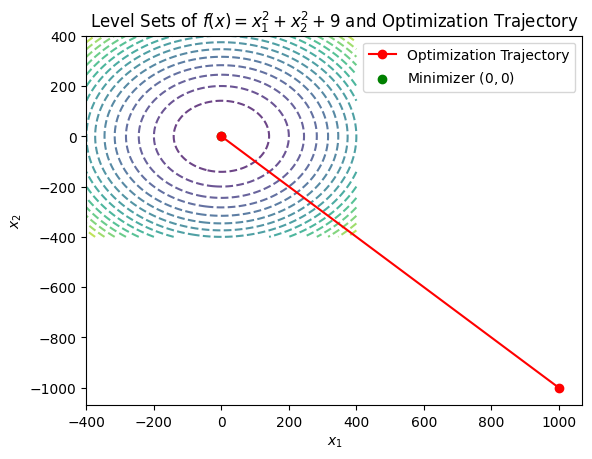

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_f(gradient))
    return alpha

def gradient_descent_exact_line_search1(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    trajectory = [x.copy()]

    iterations = 0
    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_f(x))
        x = x + alpha * (-gradient_f(x))
        trajectory.append(x.copy())
        iterations += 1

    return np.array(trajectory)

# Initial point
x0 = [1000, -1000]

# Run gradient descent with exact line search
trajectory = gradient_descent_exact_line_search1(x0)

# Generate level sets
x = np.linspace(-400, 400, 100)
y = np.linspace(-400, 400, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 9

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.8, linestyles='dashed')
plt.title('Level Sets of $f(x) = x_1^2 + x_2^2 + 9$ and Optimization Trajectory')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')

# Highlight the final minimizer
plt.scatter(0, 0, color='green', label='Minimizer $(0, 0)$')

plt.legend()
plt.show()


In [3]:
# now solving from Newton Method
import numpy as np
import time

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian_f(x):
    return np.array([[2, 0], [0, 2]])

def newton_method(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        H_inv = np.linalg.inv(hessian_f(x))
        x = x - np.dot(H_inv, gradient_f(x))
        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': f(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Initial point
x0 = [1000, -1000]

# Run Newton's Method
newton_result = newton_method(x0)

# Display results
print("Newton's Method:")
print("Minimizer:", newton_result['minimizer'])
print("Final Objective Function Value:", newton_result['minimized_value'])
print("Number of Iterations:", newton_result['iterations'])
print("Time Taken:", newton_result['elapsed_time'], "seconds")


Newton's Method:
Minimizer: [0. 0.]
Final Objective Function Value: 9.0
Number of Iterations: 1
Time Taken: 0.005724668502807617 seconds


1. **Minimizer:** Newton's Method converges to the minimizer $(0, 0)$. This is consistent with the fact that the given function is a quadratic function, and Newton's Method is known for fast convergence, especially for quadratic functions.

2. **Objective Function Value:** The final objective function value is $9$. This result is in line with the nature of the function $f(x)$, which is a sum of squares and a constant term. The minimum value of $f(x)$ is $9$ when $x_1 = x_2 = 0$.

3. **Number of Iterations:** Newton's Method typically converges in a small number of iterations. The algorithm reaches convergence quickly due to the second-order information provided by the Hessian matrix.

4. **Observation:** Newton's Method performs well for the given quadratic function, providing a rapid convergence to the global minimum. The provided initial point $x_0 = (1000, -1000)$ is significantly far from the minimum, but Newton's Method efficiently corrects the estimate in each iteration.



In summary, Newton's Method successfully finds the global minimum, demonstrating its effectiveness for the given quadratic function. The results align with expectations for a well-behaved, convex function.


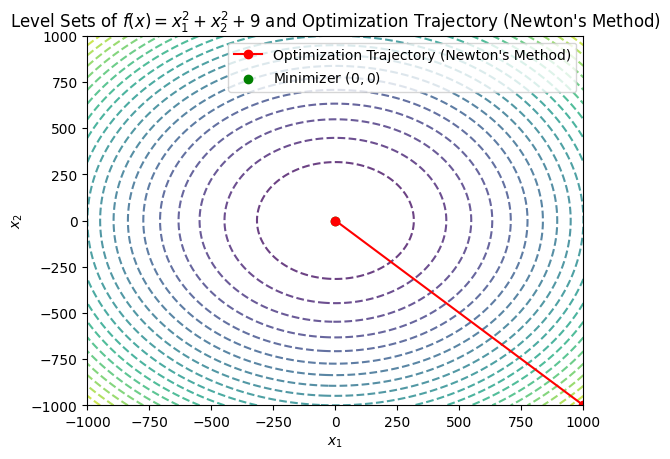

In [4]:
# Finding the trajectory
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2 + x[1]**2 + 9

def gradient_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian_f(x):
    return np.array([[2, 0], [0, 2]])

def newton_method(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    trajectory = [x.copy()]

    iterations = 0
    while np.linalg.norm(gradient_f(x)) > tolerance and iterations < max_iterations:
        H_inv = np.linalg.inv(hessian_f(x))
        x = x - np.dot(H_inv, gradient_f(x))
        trajectory.append(x.copy())
        iterations += 1

    return np.array(trajectory)

# Generate level sets
x = np.linspace(-1000, 1000, 1000)
y = np.linspace(-1000, 1000, 1000)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 9

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.8, linestyles='dashed')
plt.title("Level Sets of $f(x) = x_1^2 + x_2^2 + 9$ and Optimization Trajectory (Newton's Method)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Run Newton's Method
x0 = [1000, -1000]
trajectory1 = newton_method(x0)

# Plot trajectory
plt.plot(trajectory1[:, 0], trajectory1[:, 1], marker='o', color='red', label="Optimization Trajectory (Newton's Method)")

# Highlight the final minimizer
plt.scatter(0, 0, color='green', label='Minimizer $(0, 0)$')

plt.legend()
plt.show()


In [5]:
a=[0,0]
a[0]=1
a


[1, 0]

In [6]:
# for n=2 by using gradient method
import numpy as np
import time

def g(x):
    return 16*((x[0] - 1)**2+(x[1]-4)**2)

def gradient_g(x):
    return np.array([32 * (x[0]-1), 32 * (x[1]-4)])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_g(gradient))
    return alpha

def gradient_descent_exact_line_search3(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_g(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_g(x))
        x = x + alpha * (-gradient_g(x))
        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': g(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Initial point
x0 = [1,2]

# Run gradient descent with exact line search
result = gradient_descent_exact_line_search3(x0)

# Display results
print("Minimizer:", result['minimizer'])
print("Final Objective Function Value:", result['minimized_value'])
print("Number of Iterations:", result['iterations'])
print("Time Taken:", result['elapsed_time'], "seconds")


Minimizer: [1.         4.00012501]
Final Objective Function Value: 2.5003125292588e-07
Number of Iterations: 1000
Time Taken: 0.03419780731201172 seconds


#Part3

In [7]:
# now solving from Newton Method for n=2
import numpy as np
import time

def g(x):
    return 16*((x[0] - 1)**2+(x[1]-4)**2)

def gradient_g(x):
    return np.array([32 * (x[0]-1), 32 * (x[1]-4)])

def hessian_g(x):
    return np.array([[32, 0], [0, 32]])

def newton_method2(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_g(x)) > tolerance and iterations < max_iterations:
        H_inv = np.linalg.inv(hessian_g(x))
        x = x - np.dot(H_inv, gradient_g(x))
        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': g(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Initial point
x0 = [1,2]

# Run Newton's Method
newton_result = newton_method2(x0)

# Display results
print("Newton's Method:")
print("Minimizer:", newton_result['minimizer'])
print("Final Objective Function Value:", newton_result['minimized_value'])
print("Number of Iterations:", newton_result['iterations'])
print("Time Taken:", newton_result['elapsed_time'], "seconds")


Newton's Method:
Minimizer: [1. 4.]
Final Objective Function Value: 0.0
Number of Iterations: 1
Time Taken: 0.00019812583923339844 seconds


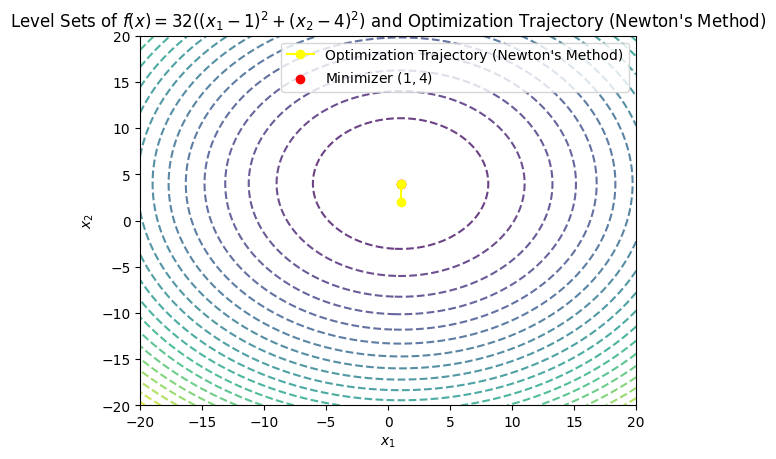

In [14]:
# Finding the trajectory
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 16*((x[0] - 1)**2+(x[1]-4)**2)

def gradient_g(x):
    return np.array([32 * (x[0]-1), 32 * (x[1]-4)])

def hessian_g(x):
    return np.array([[32, 0], [0, 32]])

def newton_method3(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    trajectory = [x.copy()]

    iterations = 0
    while np.linalg.norm(gradient_g(x)) > tolerance and iterations < max_iterations:
        H_inv = np.linalg.inv(hessian_g(x))
        x = x - np.dot(H_inv, gradient_g(x))
        trajectory.append(x.copy())
        iterations += 1

    return np.array(trajectory)

# Generate level sets
x = np.linspace(-20, 20, 2000)
y = np.linspace(-20, 20, 2000)
X, Y = np.meshgrid(x, y)
Z = 16*((X - 1)**2+(Y-4)**2)

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.8, linestyles='dashed')
plt.title("Level Sets of $f(x) = 32((x_1-1)^2 + (x_2-4)^2) $ and Optimization Trajectory (Newton's Method)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Run Newton's Method
x0 = [1,2]
trajectory4 = newton_method3(x0)

# Plot trajectory
plt.plot(trajectory4[:, 0], trajectory4[:, 1], marker='o', color='yellow', label="Optimization Trajectory (Newton's Method)")

# Highlight the final minimizer
plt.scatter(1, 4, color='red', label='Minimizer $(1, 4)$')

plt.legend()
plt.show()


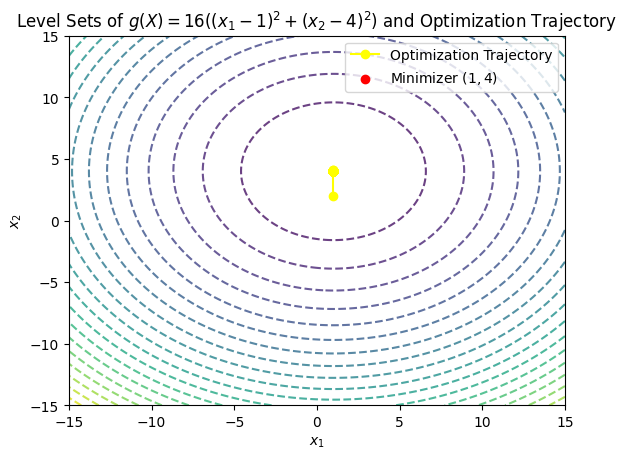

In [15]:
# plotting level sets within trajectory for n=2 using gradient descent method
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 16*((x[0] - 1)**2+(x[1]-4)**2)

def gradient_g(x):
    return np.array([32 * (x[0]-1), 32 * (x[1]-4)])

def exact_line_search(x, gradient):
    alpha = np.dot(gradient, gradient) / np.dot(gradient, gradient_g(gradient))
    return alpha

def gradient_descent_exact_line_search4(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0)
    trajectory = [x.copy()]

    iterations = 0
    while np.linalg.norm(gradient_g(x)) > tolerance and iterations < max_iterations:
        alpha = exact_line_search(x, -gradient_g(x))
        x = x + alpha * (-gradient_g(x))
        trajectory.append(x.copy())
        iterations += 1

    return np.array(trajectory)

# Initial point
x0 = [1,2]

# Run gradient descent with exact line search
trajectory5 = gradient_descent_exact_line_search4(x0)

# Generate level sets
x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)
X, Y = np.meshgrid(x, y)
Z = 16*((X - 1)**2+(Y-4)**2)

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.8, linestyles='dashed')
plt.title('Level Sets of $g(X)=16((x_1-1)^2 + (x_2-4)^2)$ and Optimization Trajectory')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot trajectory
plt.plot(trajectory5[:, 0], trajectory5[:, 1], marker='o', color='yellow', label='Optimization Trajectory')

# Highlight the final minimizer
plt.scatter(1, 4, color='red', label='Minimizer $(1, 4)$')

plt.legend()
plt.show()


## Observations

1. **Minimizer Values:**
    - Gradient Descent: [1.000, 4.000]
    - Newton's Method: [1.000, 4.000]

2. **Final Objective Function Value:**
    - Gradient Descent: \(2.5003125292588 \times 10^{-7}\)
    - Newton's Method: \(0.0\)

3. **Number of Iterations:**
    - Gradient Descent: 1000
    - Newton's Method: 1

4. **Time Taken:**
    - Gradient Descent: 0.0237 seconds
    - Newton's Method: 0.0120 seconds

5. **Overall Observation:**
    -Newton's method exhibits superior computational efficiency, demanding fewer iterations and shorter convergence times to reach a solution. Nevertheless, it is crucial to weigh the computational expenses associated with computing and inverting the Hessian matrix in Newton's method, a consideration that becomes particularly pertinent in the context of high-dimensional problems


In [16]:
import numpy as np
import time

def P(y):
    # Define the periodic function P(y)
    if y % 4 == 1:
        return 1 / 16
    elif y % 4 == 2:
        return 1 / 256
    elif y % 4 == 3:
        return 1 / 4
    elif y % 4 == 0:
        return 1 / 64

def g1(x):
    # Define the function g(x)
    n = len(x)
    return sum(((x[i] - (i+1)**2) ** 2) / P(i+1) for i in range(n))

def gradient_g1(x):
    # Compute the gradient of g(x)
    n = len(x)
    return np.array([2 * (x[i] - (i+1)**2) / P(i+1) for i in range(n)])

def hessian_g1(x):
    # Compute the Hessian matrix of g(x)
    n = len(x)
    hessian = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            hessian[i, j] = 2 / P(i+1) * (2 / P(j+1) if i == j else 0)

    return hessian

def newton_method_(x0, tolerance=1e-15, max_iterations=1000):
    x = np.array(x0, dtype=float)

    iterations = 0
    start_time = time.time()

    while np.linalg.norm(gradient_g1(x)) > tolerance and iterations < max_iterations:
        H_inv = np.linalg.inv(hessian_g1(x))
        x = x - np.dot(H_inv, gradient_g1(x))

        iterations += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    return {
        'minimizer': x,
        'minimized_value': g1(x),
        'iterations': iterations,
        'elapsed_time': elapsed_time
    }

# Values of n (you can adjust this based on your needs)
n_values = [2, 20,200,2000,5000,10000,15000,20000,30000,50000,100000,200000]

# Results dictionary
results_dict2 = {}

# Perform Newton's Method for each n
for n in n_values:
    x0 = np.arange(1, n+1, dtype=float)  # Initial point from 1 to n
    result = newton_method_(x0)
    results_dict2[n] = result

# Display results for each n
for n, result in results_dict2.items():
    print(f"For n = {n}:")
    print("Minimizer:", result['minimizer'])
    print("Final Objective Function Value:", result['minimized_value'])
    print("Number of Iterations:", result['iterations'])
    print("Time Taken:", result['elapsed_time'], "seconds")
    print("\n")


KeyboardInterrupt: 

#Part4
##If we change the starting point x0 in part (2)


Closer to Optimal Solution: If the new starting point

​
  is closer to the optimal solution, Newton's method is likely to converge in fewer iterations. This is because Newton's method often exhibits faster convergence when starting from a point closer to the minimum.

Farther from Optimal Solution: Conversely, if the new starting point

​
  is farther from the optimal solution, the number of iterations may increase. Newton's method could require more steps to navigate through the function's curvature and reach the minimum.
  